# DATA LOADING AND CLEANING

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("telegram_messages.csv")

# Display basic information about the data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       200 non-null    object 
 1   sender_id  200 non-null    float64
 2   text       196 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB
None
                        date     sender_id  \
0  2024-12-04 09:18:49+00:00 -1.001190e+12   
1  2024-12-04 09:13:47+00:00 -1.001190e+12   
2  2024-12-04 09:09:06+00:00 -1.001190e+12   
3  2024-12-04 08:50:37+00:00 -1.001190e+12   
4  2024-12-04 08:50:28+00:00 -1.001190e+12   

                                                text  
0                                                533  
1  Equity Pick \n\nBTST\n\nVIEW \n\nSIYARAM SILK ...  
2                                            3690 🔥🔥  
3      **TO JOIN PRIME GROUP**, `PING` @SG005 ✔️✔️✔️  
4  THAT IS THE FEEDBACK WE LOVE TO SEE FROM OUR P...  


In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing message text (if text is your main focus)
df = df.dropna(subset=["text"])

# Optionally, fill missing values in other columns
df["sender_id"] = df["sender_id"].fillna("Unknown")

# Save the cleaned file for reference
df.to_csv("cleaned_telegram_messages.csv", index=False)


date         0
sender_id    0
text         4
dtype: int64


In [3]:
# Remove duplicate messages
df = df.drop_duplicates(subset=["text"])

# Save the file
df.to_csv("deduplicated_telegram_messages.csv", index=False)


In [4]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"\s+", " ", text)    # Remove extra whitespace
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    return text.strip().lower()  # Convert to lowercase and strip whitespace

# Apply the cleaning function
df["text"] = df["text"].apply(clean_text)

# Save the cleaned text data
df.to_csv("normalized_telegram_messages.csv", index=False)


In [6]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 2.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.5 MB 2.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Remove stopwords
df["text"] = df["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

# Save the cleaned data
df.to_csv("stopwords_removed_telegram_messages.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saroj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
df.to_csv("final_cleaned_telegram_messages.csv", index=False)


In [9]:
# Check the first few rows
print(df.head())

# Get basic statistics and info
print(df.info())
print(df.describe())


                        date     sender_id  \
0  2024-12-04 09:18:49+00:00 -1.001190e+12   
1  2024-12-04 09:13:47+00:00 -1.001190e+12   
2  2024-12-04 09:09:06+00:00 -1.001190e+12   
3  2024-12-04 08:50:37+00:00 -1.001190e+12   
4  2024-12-04 08:50:28+00:00 -1.001190e+12   

                                                text  
0                                                533  
1  equity pick btst view siyaram silk cmp 860865 ...  
2                                               3690  
3                        join prime group ping sg005  
4                    feedback love see prime traders  
<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       189 non-null    object 
 1   sender_id  189 non-null    float64
 2   text       189 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.9+ KB
None
          sender_id
count  1.890000e+

In [10]:
!pip install TextBlob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 330.3 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 939.4 kB/s eta 0:00:01
   ---------------------- ----------------- 358.4/626.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from textblob import TextBlob

# Add a sentiment column
df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize the sentiment
df["sentiment_label"] = df["sentiment"].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")

# Save the sentiment data
df.to_csv("sentiment_telegram_messages.csv", index=False)


## VISUALIZE

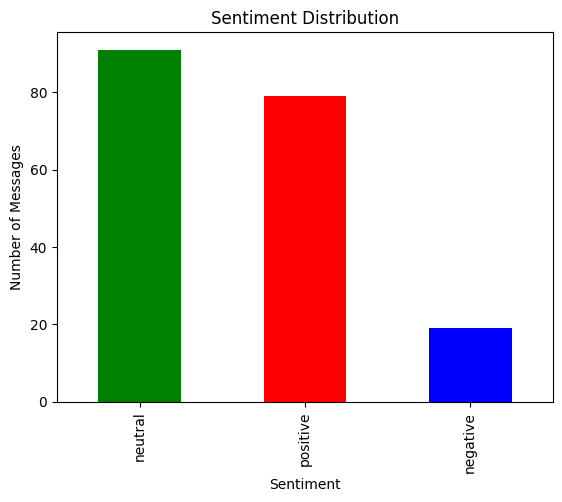

In [12]:
import matplotlib.pyplot as plt

# Plot sentiment counts
df["sentiment_label"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()
